# Water Quality
## Drinking water potability
Este dataset esta en [Calidad del Agua ](https://www.kaggle.com/adityakadiwal/water-potability) en kaggle.<br>
Importancia de la calidad del agua <br>
El acceso al agua potable es muy dificil en algunas partes del mundo. Por que por medio de este notebook se busca una forma de obtener informacion acerca de la potabilidad del agua con algun tipo de modelo en la rama de la inteligencia artificial

In [1]:
import pandas as pd # manejar el dataset
import matplotlib.pyplot as plt # graficar
import seaborn as sns

df = pd.read_csv('water_potability.csv')
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Se puede observar la falta de datos en algunas columnas.
Lo mejor sera eliminar dichas filas pues los datos pueden no ser los correctos si se sustituyen con el promedio, moda o alguna otra tendencia.

In [2]:
print(df.shape)
df2 = df.copy()
df2.dropna(inplace= True)
print(df2.shape)

(3276, 10)
(2011, 10)


In [3]:
df2.reset_index(drop= True,inplace=True)
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [4]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


# Correlacion en los datos 
Usando Seaborn una libreria que nos ayudara una matriz de correlacion entre los atributos.

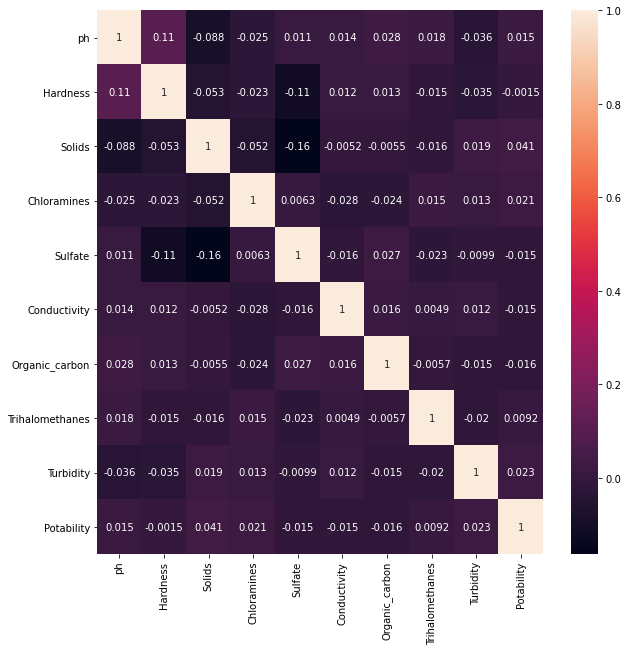

In [5]:
import seaborn as sns
df_small = df2.copy()
correlation_mat = df_small.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)

plt.show()

Al existir poca correlacion entre los atributos del dataset, es dificil reducir la dimensionalidad o usar alguna red neural convencional <br> Por lo que considerar usar polynomial regression, SVMs, randomforest seran la mejor opcion.

## Random Forest


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR


from sklearn.model_selection import train_test_split
X = df2.drop('Potability', axis=1)
y = df2['Potability']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#Standarizo los datos 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
models = {'RandomForest': RandomForestClassifier(n_estimators=2), 
    'SVC': svm.SVC(),
    'bossting':  GradientBoostingClassifier(n_estimators=50,learning_rate=0.08)
            }

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name)
    print(model.score(X_test,y_test))
    print('*'*10)

RandomForest
0.6228287841191067
**********
SVC
0.707196029776675
**********
bossting
0.6823821339950372
**********


Podemos ver que Suppor Vector Classifier  tiene mayor puntaje.<br>
Que pasara si hacemos un Bagging con cada modelo?

In [9]:
from sklearn.ensemble import BaggingClassifier
for name, model in models.items():
    model = BaggingClassifier(base_estimator=model, n_estimators=50)
    print(name)
    model.fit(X_train, y_train)
    print(model.score(X_test,y_test))

RandomForest
0.6997518610421837
SVC
0.7146401985111662
bossting
0.674937965260546
